# K-Means clustering

# Importing Required labraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Live data set 

In [4]:
df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7050, 16)

In [6]:
df = df.drop(['Column1','Column2','Column3','Column4'], axis= 1)


In [7]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


# Viewing the statistical summary of numerical variables

In [9]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# Exploring status variable

In [10]:
len(df['status_id'].unique())

6997

In [11]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [12]:
len(df['status_type'].unique())

4

# Droping other charactrastic cloumns

In [13]:
df1 = df.drop(['status_id','status_published'], axis= 1)

In [14]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [15]:
df1.duplicated().sum()

np.int64(2063)

# Declare feature vector and target variable

In [16]:
x = df1
y = df1['status_type']

# Convert categorical variable into integers

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['status_type'] = le.fit_transform(x['status_type'])
y = le.transform(y)

In [23]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [22]:
x['status_type'].unique()


array([3, 1, 0, 2])

# Feature Scaling

In [24]:
cols = x.columns



In [26]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

x = ms.fit_transform(x)

In [27]:
x = pd.DataFrame(x, columns=[cols])

In [28]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-means model with two clusters

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2, random_state=0)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [61]:
kmeans.inertia_

237.75726404419547

In [62]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

# Checking quality of weak classification by the model

In [78]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Result: 4009 out of 7050 samples were correctly labeled.
Accuracy score: 0.57


# Use elbow method to find optimal number of clusters

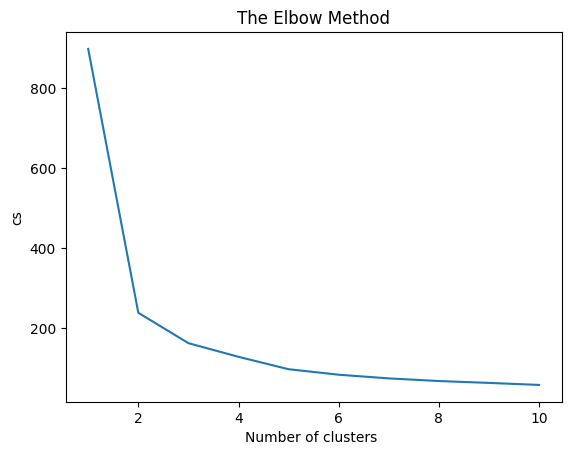

In [65]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter= 300, n_init=10, random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel("Number of clusters ")
plt.ylabel("cs")
plt.show()

# For 2 cluster

In [73]:
kmeans = KMeans(n_clusters= 2, random_state=0)

kmeans.fit(x)

labels = kmeans.labels_


correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


# For 3 cluster

In [74]:
kmeans = KMeans(n_clusters= 3, random_state=0)

kmeans.fit(x)

labels = kmeans.labels_


correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


# For 5 cluster


In [75]:
kmeans = KMeans(n_clusters= 5, random_state=0)

kmeans.fit(x)

labels = kmeans.labels_


correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Result: 4080 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


# For 10 cluster

In [77]:
kmeans = KMeans(n_clusters= 10, random_state=0)

kmeans.fit(x)

labels = kmeans.labels_


correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Result: 4009 out of 7050 samples were correctly labeled.
Accuracy score: 0.57


1. In this project i have implemented the most popular insupervised clustering technique called k-Means
2. For K-Means got the accuracy of 0.57 for 2 clusters

3. For better results i used Elbow method 
4. In this--- for 2 cluster got accuracy of 0.61
5. ----- for 3 cluster got accuracy of 0.58
6. ----- for 5 cluster got accuracy of 0.58
7. ----- for 10 cluster got accuracy of 0.57


# Got most Accuracy for 2 cluster after using elbow method

